In [1]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import date
from datetime import datetime
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Cargar base de datos de CrunchBase
Argentina = pd.read_csv('ArgentinaCB-5March21.csv')
Brazil = pd.read_csv('BrazilCB-5March21.csv')
Chile = pd.read_csv('ChileCB-5March21.csv')
Colombia = pd.read_csv('ColombiaCB-5March21.csv')
Germany = pd.read_csv('GermanyCB-5March21.csv')
Israel = pd.read_csv('IsraelCB-5March21.csv')
Mexico = pd.read_csv('MexicoCB-5March21.csv')
Spain = pd.read_csv('SpainCB-5March21.csv')
Switzerland = pd.read_csv('SwitzerlandCB-5March21.csv')
Uruguay = pd.read_csv('USACB-5March21.csv')
USA = pd.read_csv('UruguayCB-5March21.csv')
#Creamos un diccionario para facilitar la accesivilidad a los DataFrame
Data_countries = {'Argentina':Argentina,'Brazil':Brazil,'Chile':Chile,'Colombia':Colombia,'Germany':Germany,'Israel':Israel,
                  'Mexico':Mexico,'Spain':Spain,'Switzerland':Switzerland,'Uruguay':Uruguay,'USA':USA}

In [3]:
#Seleccionar columnas a analizar
columns = ['Organization Name','Industries','Estimated Revenue Range','Headquarters Location','Description','CB Rank (Company)',
           'Operating Status','Number of Articles','Full Description','Industry Groups','Number of Founders',
           'Founders','Number of Employees','Number of Exits','Number of Funding Rounds','Funding Status',
           'Last Funding Amount','Last Funding Amount Currency (in USD)','Last Funding Type',
           'Last Equity Funding Amount Currency (in USD)','Last Equity Funding Type','Last Funding Date',
           'Total Equity Funding Amount Currency (in USD)','Total Funding Amount Currency (in USD)',
           'Top 5 Investors','Number of Lead Investors','Number of Investors','IPO Status',
           'CB Rank (Organization)','BuiltWith - Active Tech Count','G2 Stack - Total Products Active']

In [4]:
#Preprocesamiento, iteramos sobre los elementos
for country in Data_countries:
  #Seleccionamos las variables a analizar
  Data_countries[country] = Data_countries[country][columns]

In [5]:
Data_countries[country].head()

,Organization Name,Industries,Estimated Revenue Range,Headquarters Location,Description,CB Rank (Company),Operating Status,Number of Articles,Full Description,Industry Groups,Number of Founders,Founders,Number of Employees,Number of Exits,Number of Funding Rounds,Funding Status,Last Funding Amount,Last Funding Amount Currency (in USD),Last Funding Type,Last Equity Funding Amount Currency (in USD),Last Equity Funding Type,Last Funding Date,Total Equity Funding Amount Currency (in USD),Total Funding Amount Currency (in USD),Top 5 Investors,Number of Lead Investors,Number of Investors,IPO Status,CB Rank (Organization),BuiltWith - Active Tech Count,G2 Stack - Total Products Active
0,dLocal,"E-Commerce, Emerging Markets, Financial Servic...",$50M to $100M,"Montevideo, NA - Uruguay, Uruguay",DLocal is a cross-border payment processor tha...,"1,405",Active,44.0,DLocal is a 360 payments technology platform d...,"Commerce and Shopping, Financial Services, Mob...",2.0,"Sebastian Kanovich, Sergio Fogel",251-500,NaN,3.0,Private Equity,200000000.0,200000000.0,Private Equity,200000000.0,Private Equity,2020-09-15,207000000.0,207000000.0,"General Atlantic, Addition, Oren Zeev, Expand ...",1.0,4.0,Private,"1,522",27.0,7.0
1,PedidosYa,"Delivery, Delivery Service, E-Commerce, Food D...",$1M to $10M,"Montevideo, NA - Uruguay, Uruguay",PedidosYa is an online and mobile food-orderin...,"5,205",Active,17.0,PedidosYa is the market leader for online food...,"Administrative Services, Commerce and Shopping...",3.0,"Alvaro Garcia, Ariel Burschtin, Ruben Sosenke",1001-5000,NaN,6.0,M&A,270000000.0,270000000.0,Venture - Series Unknown,270000000.0,Venture - Series Unknown,2017-05-07,328500000.0,328500000.0,"Atomico, Delivery Hero, Kaszek Ventures, Prosp...",NaN,4.0,Private,"5,483",40.0,8.0
2,Bunker DB,"Analytics, Big Data, Business Intelligence, Di...",NaN,"Montevideo, NA - Uruguay, Uruguay",We are a tech company aimed at enhancing the e...,"21,939",Active,6.0,We are one of the most powerful and friendly m...,"Data and Analytics, Sales and Marketing, Software",1.0,Avedis Boudakian,11-50,NaN,3.0,Early Stage Venture,2000000.0,2000000.0,Series A,2000000.0,Series A,2020-03-04,2876000.0,2876000.0,Cisneros Group,NaN,1.0,Private,"22,818",NaN,NaN
3,Bankingly,"Financial Services, Information Services, Info...",$1M to $10M,"Montevideo, NA - Uruguay, Uruguay",Bankingly brings world-class digital channels ...,"27,617",Active,1.0,Bankingly allows financial institutions to pro...,"Financial Services, Information Technology",1.0,Martin Naor,11-50,NaN,1.0,Early Stage Venture,5250000.0,5250000.0,Series A,5250000.0,Series A,2018-11-14,5250000.0,5250000.0,"Endeavor Catalyst, The Rise Fund, Elevar Equity",1.0,3.0,Private,"28,690",76.0,35.0
4,Meitre,"Hospitality, Internet, Reservations, Restaurants",Less than $1M,"Montevideo, NA - Uruguay, Uruguay","Meitre is an online reservations, guest, and r...","29,066",Active,1.0,Meitre is a guest manager for restaurants to b...,"Events, Food and Beverage, Internet Services, ...",2.0,"Juan Ignacio Caviglia, Luis Caviglia",1-10,NaN,2.0,Seed,1600000.0,1600000.0,Seed,1600000.0,Seed,2019-05-16,1720000.0,1720000.0,"Andreessen Horowitz, 500 Startups, Y Combinato...",2.0,7.0,Private,"30,177",30.0,9.0


1. Cuánto capital se ha invertido en LaTAM durante el último año. Desagregue gráficamente
por país

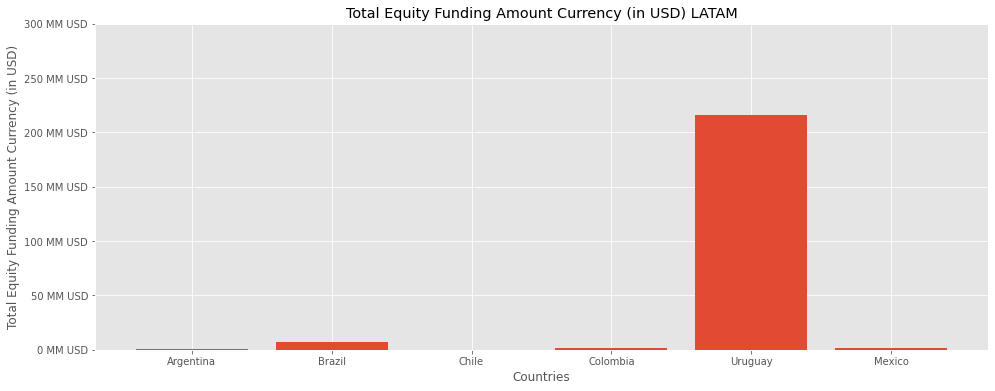

In [6]:
LATAM = []
#Seleccionamos los Países de Latinoamérica
Paises_Latam = ['Argentina','Brazil','Chile','Colombia','Uruguay','Mexico']
for country in Paises_Latam:
  #Para cada país miramos si el monto de la empresa de este, la fecha esta entre 2020 y 2021 y lo sumamos
  total = 0
  for fecha,acomulado in zip(Data_countries[country]['Last Funding Date'],Data_countries[country]['Total Equity Funding Amount Currency (in USD)']):
    if isinstance(fecha,str):
      year,month,day = tuple(int(time) for time in fecha.split('-'))
      if (year == 2020 or year == 2021) and acomulado > 0:
        total += acomulado
  #Agremos los resultados en una lista
  LATAM.append(total)
#Graficamos estos resultados
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.bar(Paises_Latam,LATAM)
tiyks = [0,50000000000,100000000000,150000000000,200000000000,250000000000,300000000000]
tix_label = ['{:.0f} MM USD'.format(n/1000000000) for n in tiyks]
plt.yticks(tiyks,tix_label)
plt.xlabel('Countries')
plt.ylabel('Total Equity Funding Amount Currency (in USD)')
plt.title('Total Equity Funding Amount Currency (in USD) LATAM')
plt.show()

2. Haga una comparación entre Colombia con cada uno de los otros países. Analice.

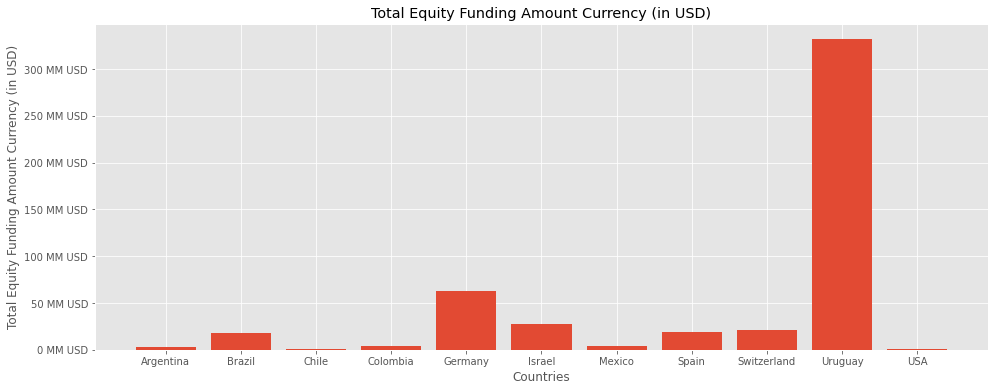

In [7]:
total = []
mean = []
des = []
#Para cada país miramos el monto total recaudado, su media y varianza.
for country in Data_countries:
  total.append(Data_countries[country]['Total Equity Funding Amount Currency (in USD)'].sum())
  mean.append(Data_countries[country]['Total Equity Funding Amount Currency (in USD)'].mean())
  des.append(Data_countries[country]['Total Equity Funding Amount Currency (in USD)'].std())
width = 0.35
x = np.arange(len(mean))
#Graficamos el total
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.bar(list(Data_countries.keys()),total)
plt.xlabel('Countries')
tiyks = [0,50000000000,100000000000,150000000000,200000000000,250000000000,300000000000]
tix_label = ['{:.0f} MM USD'.format(n/1000000000) for n in tiyks]
plt.yticks(tiyks,tix_label)
plt.ylabel('Total Equity Funding Amount Currency (in USD)')
plt.title('Total Equity Funding Amount Currency (in USD)')
plt.show()

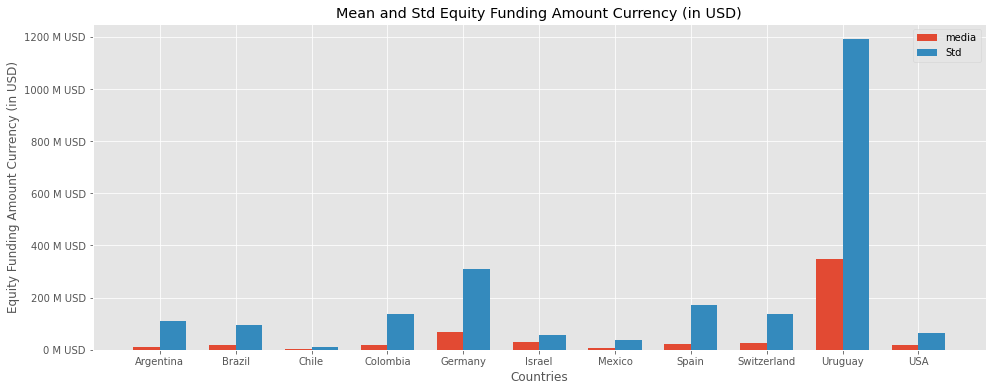

In [8]:
#Graficamos la media y varianza de los montos recaudados.
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.bar(x - width/2,mean,width,label='media')
plt.bar(x + width/2,des,width,label='Std')
tiyks = [0,200000000,400000000,600000000,800000000,1000000000,1200000000]
tix_label = ['{:.0f} M USD'.format(n/1000000) for n in tiyks]
plt.yticks(tiyks,tix_label)
plt.xticks(x,labels=list(Data_countries.keys()))
plt.legend()
plt.xlabel('Countries')
plt.ylabel('Equity Funding Amount Currency (in USD)')
plt.title('Mean and Std Equity Funding Amount Currency (in USD)')
plt.show()

In [9]:
#Miramos cuales son las industrias que más aparecen el el Dataset
Industries = []
count_in = []
for country in Data_countries:
  for industrias in Data_countries[country]['Industries']:
    if not isinstance(industrias,str):
      continue
    for industria in industrias.split(', '):
      if industria in Industries:
        index = Industries.index(industria)
        count_in[index] += 1
      else:
        Industries.append(industria)
        count_in.append(1)
Industries = np.array([Industries,count_in]).transpose()
Industries = pd.DataFrame(Industries,columns=['Industries','Number']).sort_values(['Number'],ascending=False)
Industries.head(10)

,Industries,Number
1,Internet,993
25,Hospitality,98
49,Health Care,976
13,Financial Services,966
417,Network Security,95
42,Customer Service,93
257,Consumer Electronics,93
298,Supply Chain Management,92
149,Delivery,92
229,News,90


In [10]:
#Escogemos las 10 primeras de estas industrias y miramos cuantas fueron financiadas en cada país.
Industries_Coutries = []
Industries2 = Industries['Industries'][:10]
for country in Data_countries:
  #Iteramos sobre los países
  industria_number = [0]*len(Industries2)
  for industrias in Data_countries[country]['Industries']:
    #Iteramos sobre las industrias en conjunto
    for i,indu in enumerate(Industries2):
      #De coincidir sumamos 1 a esta industria
      if isinstance(industrias,str) and industrias.count(indu):
        industria_number[i] += 1
  Industries_Coutries.append([country]+industria_number)
Industries_Coutries = pd.DataFrame(Industries_Coutries,columns=['Country']+list(Industries2))
Industries_Coutries

,Country,Internet,Hospitality,Health Care,Financial Services,Network Security,Customer Service,Consumer Electronics,Supply Chain Management,Delivery,News
0,Argentina,164,7,43,79,0,8,2,3,23,15
1,Brazil,165,8,70,125,7,15,4,12,20,6
2,Chile,127,10,49,76,1,12,7,8,15,10
3,Colombia,99,8,51,99,0,3,4,6,19,18
4,Germany,139,11,110,90,6,7,14,20,18,5
5,Israel,106,10,169,29,51,10,14,9,7,3
6,Mexico,103,15,71,166,0,5,8,3,24,10
7,Spain,123,14,109,75,4,11,10,7,18,5
8,Switzerland,81,6,170,92,7,4,12,11,6,4
9,Uruguay,86,8,125,122,18,17,15,13,24,13


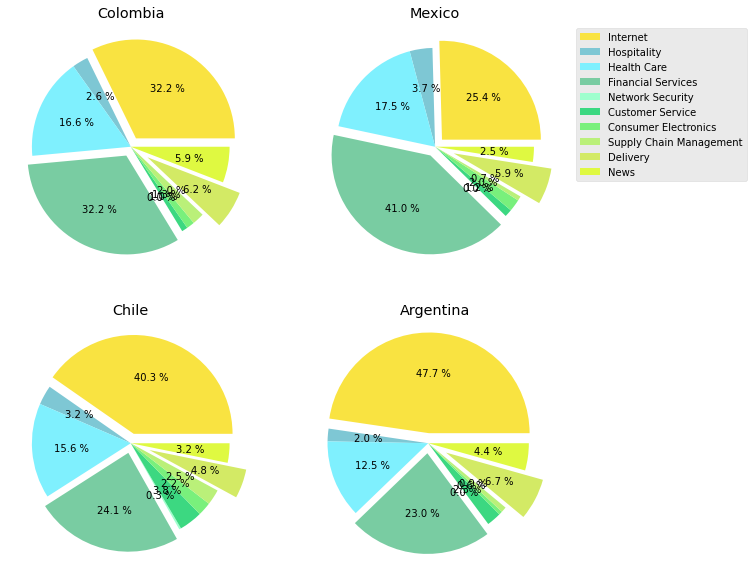

In [11]:
#Realizamos el grafico cricular para 3 países y Colombia, de los resultados anteriores
desfase = (0.1, 0, 0, 0.1, 0, 0 ,0 ,0 ,0.2 ,0)
colores = ['#F9E341','#7EC7D4','#7FF0FE','#79CCA2','#9FFFCE','#3CD881','#79F07C','#BAF079','#D3EA65','#DFF941']
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].pie(Industries_Coutries.iloc[3,1:], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[0,1].pie(Industries_Coutries.iloc[6,1:], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[1,0].pie(Industries_Coutries.iloc[2,1:], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[1,1].pie(Industries_Coutries.iloc[0,1:], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[0,0].set_title('Colombia')
axs[0,1].set_title('Mexico')
axs[1,0].set_title('Chile')
axs[1,1].set_title('Argentina')
plt.axis("equal")
axs[0,1].legend(list(Industries_Coutries.columns)[1:],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3. ¿Cuáles son los fondos que más invierten en Colombia? Haga un análisis descriptivo de
cada uno de ellos.

In [12]:
#En el Dataset de Colombia miramos el top 5 de inversores
Inversor = []
count_in = []
for inversores in Data_countries['Colombia']['Top 5 Investors']:
  if not isinstance(inversores,str):
    continue
  #Como los inversores viene empaquetados los separamos con el "split" e iteramos sobre estos
  for inversor in inversores.split(', '):
    #En caso de existir sumamos 1 al inversor o de lo contrario lo agregamos
    if inversor in Inversor:
      index = Inversor.index(inversor)
      count_in[index] += 1
    else:
      Inversor.append(inversor)
      count_in.append(1)
#Recopilamos esta información en un DataFrame y organizamos de mayor recurrencia a la menor
Inversor = np.array([Inversor,count_in]).transpose()
Inversor = pd.DataFrame(Inversor,columns=['Investors','Number']).sort_values('Number',ascending=False)
Inversor.head()

,Investors,Number
94,Velum Inverlink,9
24,500 Startups,9
98,InQlab,8
57,Magma Partners,7
23,MassChallenge,7


In [13]:
#Creamos una función donde dado un inversor, nos devuelve un DataFrame con las industrias donde este invirte
def get_Industrias(inversor):
  Industries = []
  count_in = []
  for i,industrias in enumerate(Data_countries['Colombia']['Industries']):
    inversores = Data_countries['Colombia']['Top 5 Investors'].iloc[i]
    if not isinstance(industrias,str) or not isinstance(inversores,str):
      continue
    if inversores.count(inversor):
      for industria in industrias.split(', '):
        if industria in Industries:
          index = Industries.index(industria)
          count_in[index] += 1
        else:
          Industries.append(industria)
          count_in.append(1)
  Industries = np.array([Industries,count_in]).transpose()
  Industries = pd.DataFrame(Industries,columns=['Industries ' + inversor,'Number ' + inversor]).sort_values(['Number ' + inversor],ascending=False)
  return Industries

In [14]:
#Creamos una función donde dado un inversor, nos devuelve un DataFrame con las ciudades donde este invirte
def get_Ciudad(inversor):
  Ciudades = []
  count_in = []
  for i,ciudad in enumerate(Data_countries['Colombia']['Headquarters Location']):
    inversores = Data_countries['Colombia']['Top 5 Investors'].iloc[i]
    if not isinstance(ciudad,str) or not isinstance(inversores,str):
      continue
    if inversores.count(inversor):
      if ciudad in Ciudades:
        index = Ciudades.index(ciudad)
        count_in[index] += 1
      else:
        Ciudades.append(ciudad)
        count_in.append(1)
  Ciudades = np.array([Ciudades,count_in]).transpose()
  Ciudades = pd.DataFrame(Ciudades,columns=['Headquarters Location',inversor]).sort_values([inversor],ascending=False)
  return Ciudades

In [15]:
#Creamos una función donde dado un inversor, nos devuelve un DataFrame con los estaodos de cada empresa
#donde este invirte
def pastel_estatus(inversor):
  Estatus = []
  count_in = []
  for i,estado in enumerate(Data_countries['Colombia']['Funding Status']):
    inversores = Data_countries['Colombia']['Top 5 Investors'].iloc[i]
    if not isinstance(estado,str) or not isinstance(inversores,str):
      continue
    if inversores.count(inversor):
      if estado in Estatus:
        index = Estatus.index(estado)
        count_in[index] += 1
      else:
        Estatus.append(estado)
        count_in.append(1)
  Estatus = np.array([Estatus,count_in]).transpose()
  Estatus = pd.DataFrame(Estatus,columns=['Funding Status',inversor])
  return Estatus

In [16]:
#Recopilamos la información de dada un inversor los estaodos de interes y la guardamos en un DataFrame
data_estatus = pastel_estatus('Velum Inverlink')
inversores = ['Velum Inverlink','500 Startups','InQlab','Magma Partners','MassChallenge']
for inversor in inversores[1:]:
  data = pastel_estatus(inversor)
  data_estatus = pd.merge(left=data_estatus,right=data,how='outer',
                        left_on='Funding Status',right_on='Funding Status')
data_estatus = data_estatus.fillna(0)
data_estatus

,Funding Status,Velum Inverlink,500 Startups,InQlab,Magma Partners,MassChallenge
0,Early Stage Venture,1,1,1,0,0
1,Seed,7,8,4,6,2
2,M&A,1,0,0,1,0
3,Late Stage Venture,0,0,1,0,0


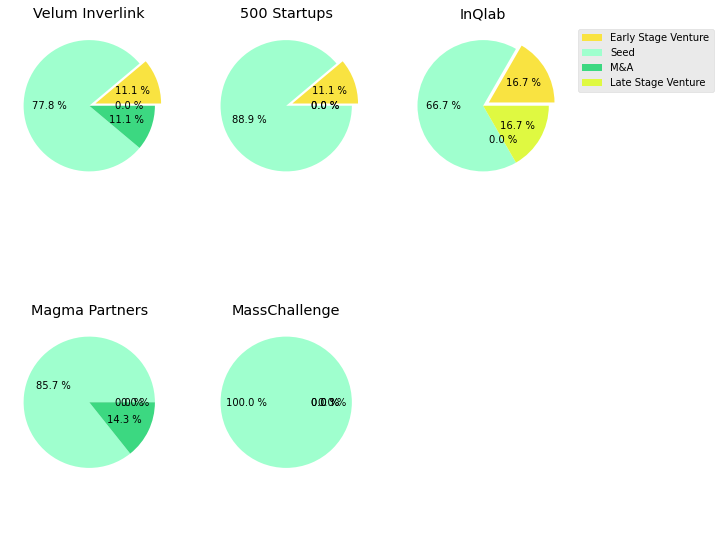

In [17]:
#Graficamos esta información en forma de pastel.
desfase = (0.1, 0, 0,0)
colores = ['#F9E341','#9FFFCE','#3CD881','#DFF941']
fig, axs = plt.subplots(2, 3,figsize=(10,10))
axs[0,0].pie(data_estatus.iloc[:,1], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[0,0].set_title('Velum Inverlink')
axs[0,1].pie(data_estatus.iloc[:,2], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[0,1].set_title('500 Startups')
axs[0,2].pie(data_estatus.iloc[:,3], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[0,2].set_title('InQlab')
axs[1,0].pie(data_estatus.iloc[:,4], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[1,0].set_title('Magma Partners')
axs[1,1].pie(data_estatus.iloc[:,5], autopct="%0.1f %%",colors=colores,explode=desfase)
axs[1,1].set_title('MassChallenge')
axs[1,2].axis('off')
plt.axis("equal")
axs[0,2].legend(data_estatus.iloc[:,0],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [18]:
#Recopilamos la información para las ciudades de interes de cada inversor
data_citys = get_Ciudad('Velum Inverlink')
inversores = ['Velum Inverlink','500 Startups','InQlab','Magma Partners','MassChallenge']
for inversor in inversores[1:]:
  data = get_Ciudad(inversor)
  data_citys = pd.merge(left=data_citys,right=data,how='outer',
                        left_on='Headquarters Location',right_on='Headquarters Location')
data_citys = data_citys.fillna(0)
data_citys

,Headquarters Location,Velum Inverlink,500 Startups,InQlab,Magma Partners,MassChallenge
0,"Bogotá, Distrito Especial, Colombia",7,5,8,4,5
1,"Medellín, Antioquia, Colombia",2,3,0,2,0
2,"Cali, Valle del Cauca, Colombia",0,1,0,1,0
3,"Sabaneta, Antioquia, Colombia",0,0,0,0,1
4,"Envigado, Antioquia, Colombia",0,0,0,0,1


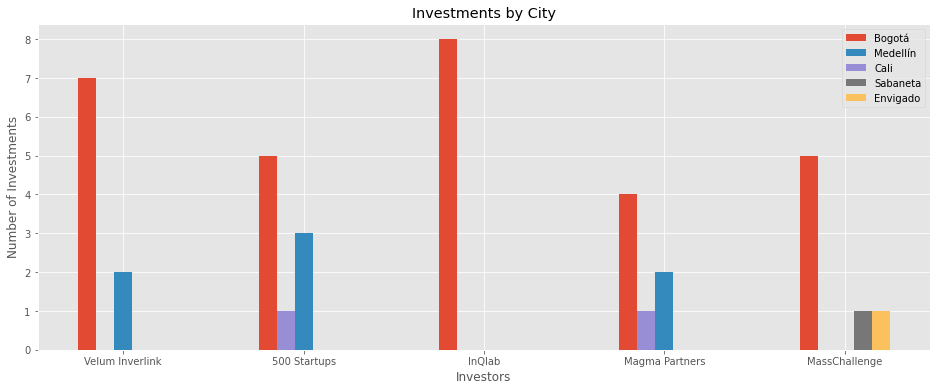

In [19]:
#Graficamos esta información
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
x = np.arange(len(inversores))
plt.bar(x - 0.2,[int(i) for i in data_citys.iloc[0,1:]],0.1,label='Bogotá')
plt.bar(x,[int(i) for i in data_citys.iloc[1,1:]],0.1,label='Medellín')
plt.bar(x - 0.1,[int(i) for i in data_citys.iloc[2,1:]],0.1,label='Cali')
plt.bar(x + 0.1,[int(i) for i in data_citys.iloc[3,1:]],0.1,label='Sabaneta')
plt.bar(x + 0.2,[int(i) for i in data_citys.iloc[4,1:]],0.1,label='Envigado')
plt.xticks(x,labels=inversores)
plt.legend()
plt.xlabel('Investors')
plt.ylabel('Number of Investments')
plt.title('Investments by City')
plt.show()

In [20]:
#llamamos la función que nos devulve las industrias de interes de cada inversor
get_Industrias('Velum Inverlink').head(5)

,Industries Velum Inverlink,Number Velum Inverlink
12,E-Commerce,5
15,Retail,2
13,Home Decor,1
23,Subscription Service,1
22,Communities,1


In [21]:
get_Industrias('500 Startups').head(5)

,Industries 500 Startups,Number 500 Startups
11,FinTech,2
15,Software,2
5,Travel,2
6,Health Care,2
1,Financial Services,2


In [22]:
get_Industrias('InQlab').head(5)

,Industries InQlab,Number InQlab
7,Financial Services,3
8,FinTech,2
9,Information Technology,2
21,Software,2
0,Customer Service,1


In [23]:
get_Industrias('Magma Partners').head(5)

,Industries Magma Partners,Number Magma Partners
2,Financial Services,2
3,FinTech,2
5,Artificial Intelligence,2
1,Finance,2
11,Developer Platform,2


In [24]:
get_Industrias('MassChallenge').head(5)

,Industries MassChallenge,Number MassChallenge
0,Accounting,1
1,Financial Services,1
18,Internet,1
17,Education,1
16,Machinery Manufacturing,1


4. Muestre gráficamente los exits de capital privado en Colombia por deal size.

In [25]:
Data_countries['Colombia'][['Organization Name','Number of Exits']].dropna(subset=['Number of Exits'])

,Organization Name,Number of Exits
196,Veronorte,1.0


In [26]:
#Cargamos el top 100 de Startups de Colombia
Top_100 = pd.read_excel('Top100Startups- Colombia.xlsx',index_col='Number')
Top_100.head()

,Co,E-m
Number,,
1,1Doc3,jcardona@1doc3.com
2,ADDI,ssuarez@addi.com
3,Aflore,manuel@aflore.co
4,Agrapp,david@agrapp.co
5,Aptuno,alejandro@aptuno.com


In [27]:
#Creamos una variable bandera, donde tendra 1 en caso de que la empresa este en el top 100 y 0 en caso contrario
Bandera = [int(name in list(Top_100['Co'])) for name in Data_countries['Colombia']['Organization Name']]
sum(Bandera)

46

In [28]:
#Separamos las industrias que se encuentren en la variable 'Industry Groups'
Industrias = []
for industrias in Data_countries['Colombia']['Industry Groups']:
  if not isinstance(industrias,str):
    continue
  for industria in industrias.split(', '):
    if not industria in Industrias:
      Industrias.append(industria)
len(Industrias)

47

In [29]:
#Selecionamos la columnas para la regresión logistica
columns = ['Headquarters Location','CB Rank (Company)','Estimated Revenue Range','Last Funding Type',
           'Number of Employees','Number of Articles']

In [30]:
#Y realizamos el preprocesamiento de este
Data_regres = Data_countries['Colombia'][columns]
for i,number in enumerate(Data_regres['Number of Employees']):
  Data_regres['CB Rank (Company)'][i] = float(Data_regres['CB Rank (Company)'][i].replace(',','.'))
  if isinstance(Data_regres['Number of Articles'][i],str):
    Data_regres['Number of Articles'][i] = float(Data_regres['Number of Articles'][i].replace(',','.'))
  if isinstance(number,str):
    try:
      Data_regres['Number of Employees'].iloc[i] = int(Data_regres['Number of Employees'].iloc[i].split('-')[0])
    except ValueError:
      Data_regres['Number of Employees'].iloc[i] = np.nan
Data_regres['Number of Employees'] = Data_regres['Number of Employees'].fillna(Data_regres['Number of Employees'].mean())
Data_regres['Headquarters Location'] = Data_regres['Headquarters Location'].fillna('Bogotá, Distrito Especial, Colombia')
Data_regres['CB Rank (Company)'] = Data_regres['CB Rank (Company)'].fillna(Data_regres['CB Rank (Company)'].mean())
Data_regres['Number of Articles'] = Data_regres['Number of Articles'].fillna(0)
Data_regres['Estimated Revenue Range'] = Data_regres['Estimated Revenue Range'].fillna(method='ffill')
Data_regres['Last Funding Type'] = Data_regres['Last Funding Type'].fillna(method='ffill')

In [31]:
Data_regres.head()

,Headquarters Location,CB Rank (Company),Estimated Revenue Range,Last Funding Type,Number of Employees,Number of Articles
0,"Medellín, Antioquia, Colombia",1.457,$1M to $10M,Series B,101.0,8.0
1,"Bogotá, Distrito Especial, Colombia",2.462,$1M to $10M,Series A,11.0,7.0
2,"Bogotá, Distrito Especial, Colombia",3.109,$1M to $10M,Seed,11.0,12.0
3,"Bogotá, Distrito Especial, Colombia",3.183,Less than $1M,Seed,51.0,16.0
4,"Bogotá, Distrito Especial, Colombia",3.449,$1M to $10M,Venture - Series Unknown,51.0,4.0


In [32]:
#Creamos una matriz de las industrias donde cada empresa tendra 1 si pertenece a esa industria y 0 en caso contrario
matriz_industrias = np.zeros((Data_regres.shape[0],len(Industrias)))
for i,industrias in enumerate(Data_countries['Colombia']['Industry Groups']):
  for j,industria in enumerate(Industrias):
    if isinstance(industrias,str) and industria in industrias:
      matriz_industrias[i,j] = 1
matriz_industrias = pd.DataFrame(matriz_industrias,columns=Industrias)
matriz_industrias.head()

,Commerce and Shopping,Information Technology,Real Estate,Consumer Goods,Sales and Marketing,Financial Services,Mobile,Payments,Software,Lending and Investments,Other,Professional Services,Transportation,Internet Services,Hardware,Food and Beverage,Data and Analytics,Apps,Community and Lifestyle,Artificial Intelligence,Science and Engineering,Administrative Services,Education,Privacy and Security,Events,Media and Entertainment,Travel and Tourism,Advertising,Content and Publishing,Video,Health Care,Consumer Electronics,Navigation and Mapping,Biotechnology,Agriculture and Farming,Sustainability,Sports,Manufacturing,Energy,Natural Resources,Gaming,Messaging and Telecommunications,Clothing and Apparel,Design,Music and Audio,Platforms,Government and Military
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Trasformamos las variables categoricas en variables Dummies y agregamos toda esta información 
#Al DataFrame Original
categorias = ['Headquarters Location','Estimated Revenue Range','Last Funding Type']

for category in categorias:
    cat_dummies = pd.get_dummies(Data_regres[category],prefix=category)
    Data_regres = Data_regres.join(cat_dummies)
    Data_regres = Data_regres.drop([category],axis=1)
Data_regres = Data_regres.join(matriz_industrias)

In [34]:
#Agregamos la variable de predicción 'Bandera'
Data_regres['Y'] = Bandera
Data_regres.head()

,CB Rank (Company),Number of Employees,Number of Articles,"Headquarters Location_Andalucía, Valle del Cauca, Colombia","Headquarters Location_Antioquia, Antioquia, Colombia","Headquarters Location_Apartadó, Antioquia, Colombia","Headquarters Location_Armenia, Quindio, Colombia","Headquarters Location_Asturias, Cundinamarca, Colombia","Headquarters Location_Atlántico, Magdalena, Colombia","Headquarters Location_Barranquilla, Atlantico, Colombia","Headquarters Location_Barrios Unidos, Distrito Especial, Colombia","Headquarters Location_Bavaria, Cundinamarca, Colombia","Headquarters Location_Bavaria, Magdalena, Colombia","Headquarters Location_Bogotá, Distrito Especial, Colombia","Headquarters Location_Boyacá, Boyaca, Colombia","Headquarters Location_Brasilia, Distrito Especial, Colombia","Headquarters Location_Bucaramanga, Cundinamarca, Colombia","Headquarters Location_Cali, Valle del Cauca, Colombia","Headquarters Location_Canadá, Cundinamarca, Colombia","Headquarters Location_Cartagena, Bolivar, Colombia","Headquarters Location_Cartago, Valle del Cauca, Colombia","Headquarters Location_Chile, Huila, Colombia","Headquarters Location_Chía, Cundinamarca, Colombia","Headquarters Location_Colombiano, Magdalena, Colombia","Headquarters Location_Copacabana, Antioquia, Colombia","Headquarters Location_Cota, Cundinamarca, Colombia","Headquarters Location_Cundinamarca, Distrito Especial, Colombia","Headquarters Location_Cúcuta, Antioquia, Colombia","Headquarters Location_Dosquebradas, Cundinamarca, Colombia","Headquarters Location_Duitama, Boyaca, Colombia","Headquarters Location_El Paso, Cesar, Colombia","Headquarters Location_Envigado, Antioquia, Colombia","Headquarters Location_Espinal, Tolima, Colombia","Headquarters Location_Florida, Santander, Colombia","Headquarters Location_Floridablanca, Santander, Colombia","Headquarters Location_Garzón, Huila, Colombia","Headquarters Location_Girardot, Cundinamarca, Colombia","Headquarters Location_Ibagué, Tolima, Colombia","Headquarters Location_Itagüí, Antioquia, Colombia","Headquarters Location_Las Vegas, Sucre, Colombia",...,Software,Lending and Investments,Other,Professional Services,Transportation,Internet Services,Hardware,Food and Beverage,Data and Analytics,Apps,Community and Lifestyle,Artificial Intelligence,Science and Engineering,Administrative Services,Education,Privacy and Security,Events,Media and Entertainment,Travel and Tourism,Advertising,Content and Publishing,Video,Health Care,Consumer Electronics,Navigation and Mapping,Biotechnology,Agriculture and Farming,Sustainability,Sports,Manufacturing,Energy,Natural Resources,Gaming,Messaging and Telecommunications,Clothing and Apparel,Design,Music and Audio,Platforms,Government and Military,Y
0,1.457,101.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.462,11.0,7.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3.109,11.0,12.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3.183,51.0,16.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3.449,51.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [35]:
#Miramos que variables de las 144 son las que aportan a la regresión logistica
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = list(Data_regres.columns)[:-1]
Y = Data_regres.columns[-1]

lr = LogisticRegression()

rfe = RFE(lr,12)
rfe = rfe.fit(Data_regres[X],np.array(Data_regres[Y]).reshape(-1,1))

In [36]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False  True False  True  True False  True  True False False
 False False False False  True False  True False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False]
[ 91 127  92  94 109 130  61  87 107  60 105  97 128  36   1  72  50  44
  47  64 126  93  67  85 113  66  20 115 104 131 123  46

In [70]:
#Nos quedamos con las variables de valoración menor a 50
X_selec = np.array(X)[rfe.ranking_ < 50]
X_selec

array(['Headquarters Location_Bogotá, Distrito Especial, Colombia',
       'Headquarters Location_Boyacá, Boyaca, Colombia',
       'Headquarters Location_Cali, Valle del Cauca, Colombia',
       'Headquarters Location_Canadá, Cundinamarca, Colombia',
       'Headquarters Location_Cundinamarca, Distrito Especial, Colombia',
       'Headquarters Location_Envigado, Antioquia, Colombia',
       'Headquarters Location_Madrid, Distrito Especial, Colombia',
       'Headquarters Location_Manizales, Caldas, Colombia',
       'Headquarters Location_Perú, Valle del Cauca, Colombia',
       'Estimated Revenue Range_$100M to $500M',
       'Estimated Revenue Range_$10M to $50M',
       'Estimated Revenue Range_$1M to $10M',
       'Estimated Revenue Range_$50M to $100M', 'Last Funding Type_Angel',
       'Last Funding Type_Convertible Note',
       'Last Funding Type_Corporate Round',
       'Last Funding Type_Debt Financing',
       'Last Funding Type_Non-equity Assistance',
       'Last Funding 

In [71]:
#Creamos la regresión logistica y entrenamos con un dataset de train el modelo
from sklearn import linear_model

logit_model = linear_model.LogisticRegression()
logit_model.fit(Data_regres[X_selec][:800],np.array(Data_regres[Y][:800]).reshape(-1,1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
#Miramos los coeficientes de cada variable para mirar su impacto en el resultado
logit_model.coef_

array([[ 0.31718027,  0.        ,  0.29222941, -0.26581308,  0.49826068,
        -0.214473  , -0.37260957,  0.66757382, -0.24829028, -0.36498073,
        -0.09229628,  0.16984288,  0.24391805, -0.57613374,  0.07665399,
        -0.20394855,  0.93331341, -1.93052218, -0.51408282, -1.3473273 ,
        -0.28842119,  1.46820897,  1.37458752,  0.67398435,  0.76501934,
         0.64452051,  0.3807551 ,  0.63007022, -0.34974204,  0.32015903,
        -0.70274365,  0.67830857,  0.6004806 ,  0.38037971,  0.55373772,
        -0.44643791,  0.47420693, -0.64962924,  0.80169823, -0.4003565 ,
        -0.66097494, -0.42319711, -0.34459085,  0.31040057, -0.27912795,
        -0.68129999, -0.42637116, -0.36986095,  0.64998358, -0.45390654,
        -0.38344157,  0.40637228, -0.4958558 , -0.40968985, -0.54046985,
        -0.27588064, -0.40840735, -0.22660343, -0.40853776, -0.23429715]])

In [73]:
#Con un DataSet de test miramos la efectividad de el modelo.
logit_model.score(Data_regres[X_selec][800:],np.array(Data_regres[Y][800:]).reshape(-1,1))

0.995